In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv(r'C:\Users\derri\Desktop\Portfolio Revamp 2\3p Project - Bank Marketing\bank.csv')

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [59]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign_interactions,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [71]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [72]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0],color = "#1D8EF5")
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1],color = "#33AAFF", edgecolor="#1D1EA2")
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linestyle='--',linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linestyle='--',linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linestyle='--',linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

# Data Cleaning

In [22]:
df.isnull().values.any()

False

In [28]:
# Replacing Column names: "Campaign" to "Campaign_interactions"
df.rename(columns = {'campaign':'campaign_interactions'}, inplace = True)

In [61]:
# Replacing Index names: "Outcome", "Other" to "Unknown"
df.rename(columns = {'poutcome':'poutcome'}, index = {'Outcome':'Unknown'}, inplace = True)

In [64]:
df.rename(columns = {'poutcome':'poutcome'}, index = {'Other':'Unknown'}, inplace = True)

In [62]:
df.rename(columns = {'poutcome':'poutcome'}, index = {'other':'Unknown'}, inplace = True)

In [176]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

### Drop irrelevant columns

In [171]:
df.drop('duration', axis=1, inplace=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,cap
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes,56-70
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes,56-70
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes,36-55
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes,36-55
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes,36-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no,0-35
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no,36-55
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no,0-35
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no,36-55


### Finding Correlation

In [172]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [174]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


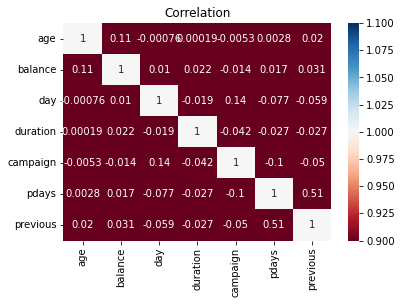

In [175]:
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=1, vmax=1)
plt.title('Correlation')
plt.show()

# Data Analysis & Visuals

### Age analysis

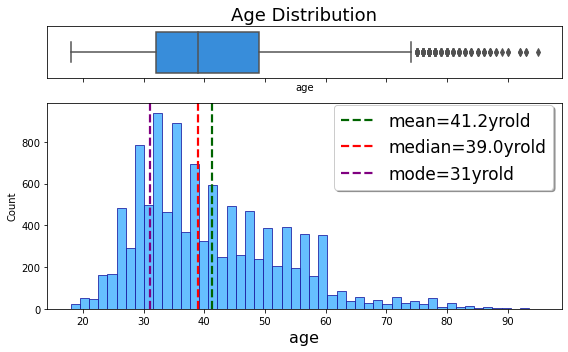

In [145]:
num_plot(df,'age','Age Distribution', 'yrold')

### Day vs Campaign success

In [146]:
palette = {'yes':'green', 'no':'red'}
palette = {'yes':'#46C646', 'no':'#FF0000'}

In [147]:
df['day'].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

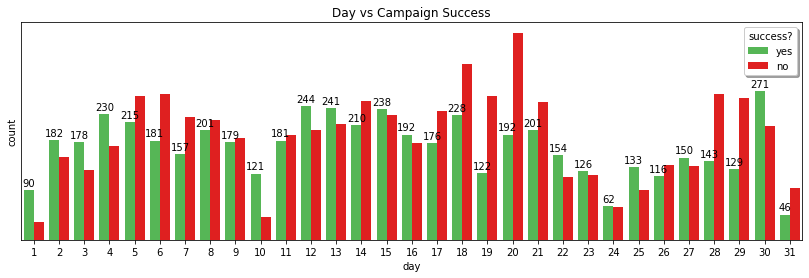

In [148]:
plt.figure(figsize = (14, 4))
plt.title('Day vs Campaign Success')
g = sns.countplot(x='day', hue='deposit', data=df, palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

### Month vs Campaign success

In [149]:
df['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

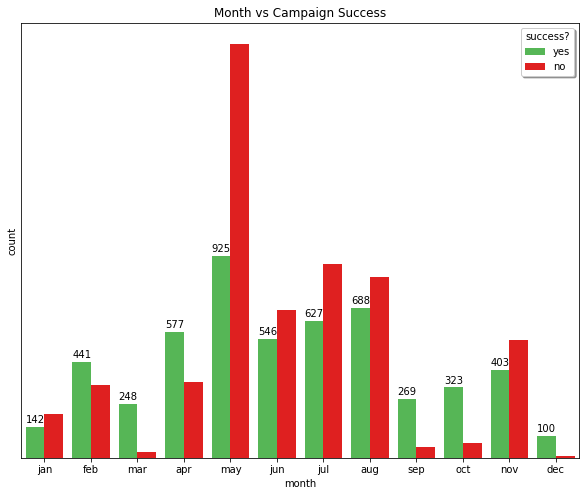

In [150]:
plt.figure(figsize = (10, 8))
plt.title('Month vs Campaign Success')
g = sns.countplot(x='month', hue='deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

### Job vs Campaign success

In [151]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

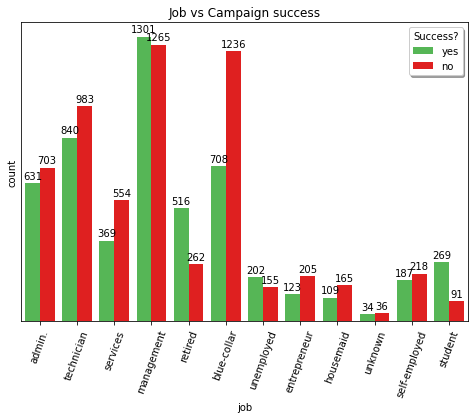

In [152]:
plt.figure(figsize=(8, 5.5));
plt.title('Job vs Campaign success')
g = sns.countplot(x= 'job', hue = 'deposit', data=df, palette=palette)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Success?', ncol=1, fancybox=True, shadow=True)
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

### Age vs Campaign success

In [154]:
df['cap'].value_counts()

36-55    5307
0-35     4371
56-70    1211
71-95     273
Name: cap, dtype: int64

In [85]:
df['cap'] = pd.cut(df['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['0-35','36-55','56-70','71-95'])

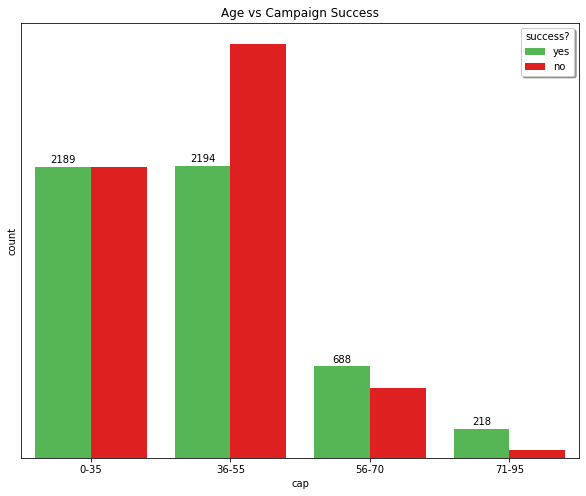

In [156]:
plt.figure(figsize = (10, 8))
plt.title('Age vs Campaign Success')
g = sns.countplot(x='cap', hue='deposit', data=df, palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

### Balance vs Age

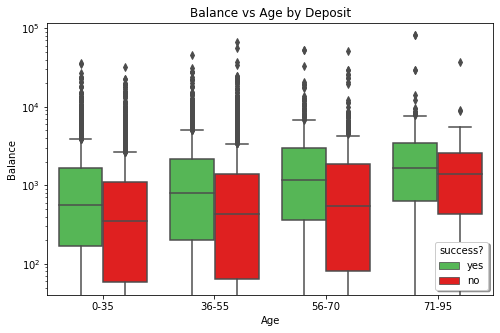

In [157]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cap', y='balance', hue='deposit', data=df, palette=palette)
plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('Balance vs Age by Deposit')
plt.yscale('log')
plt.legend(title='success?', loc='lower right', fontsize='10', fancybox=True, shadow=True, frameon=True)
plt.show()

### Housing vs Campaign success

In [158]:
df['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

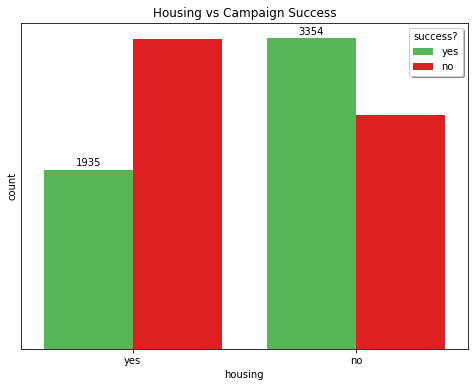

In [159]:
plt.figure(figsize = (8, 6))
plt.title('Housing vs Campaign Success')
g = sns.countplot(x='housing', hue='deposit', data=df, palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

### Poutcome vs Campaign success

In [140]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

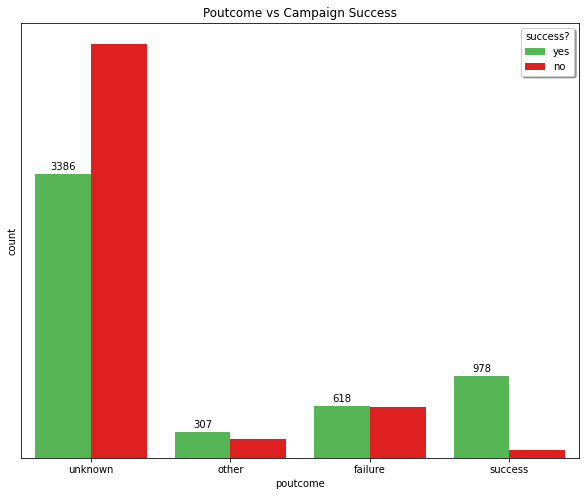

In [142]:
plt.figure(figsize = (10, 8))
plt.title('Poutcome vs Campaign Success')
g = sns.countplot(x='poutcome', hue='deposit', data=df, palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

### Loan vs Campaign success

In [143]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

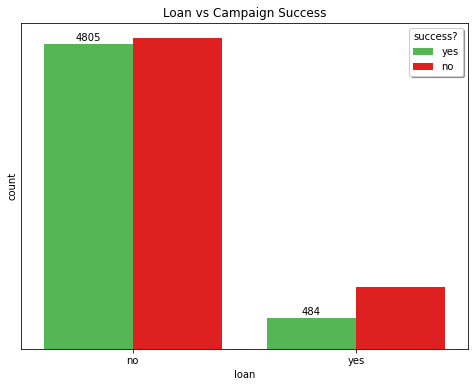

In [160]:
plt.figure(figsize = (8, 6))
plt.title('Loan vs Campaign Success')
g = sns.countplot(x='loan', hue='deposit', data=df, palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

### Education vs Campaign success

In [161]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

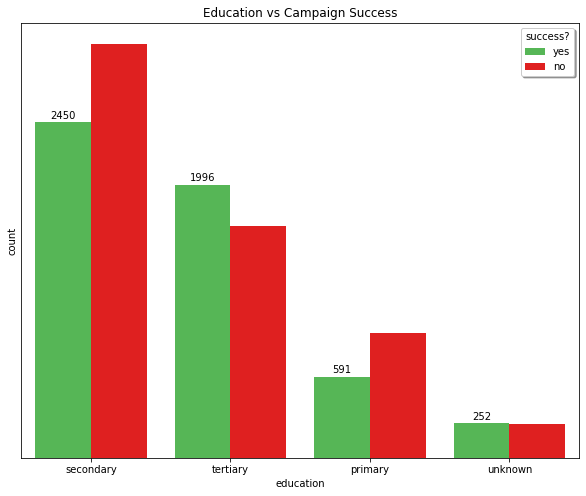

In [162]:
plt.figure(figsize = (10, 8))
plt.title('Education vs Campaign Success')
g = sns.countplot(x='education', hue='deposit', data=df, palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

### Default vs Campagion success

In [165]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

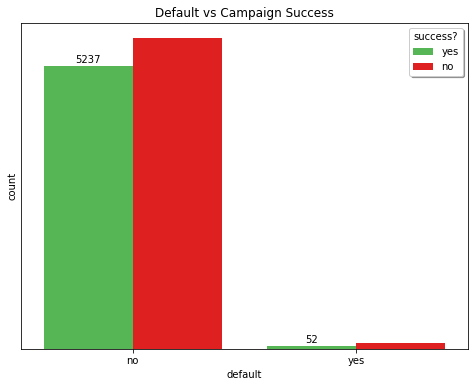

In [166]:
plt.figure(figsize = (8, 6))
plt.title('Default vs Campaign Success')
g = sns.countplot(x='default', hue='deposit', data=df, palette=palette);
plt.legend(title='success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    plt.show()

## Data Insight conclusions

#### 1. The potential customer age ranges from 18 to 95 with an average of 41
#### 2. Those Retired and / or Unemployed tend to accept the deposit & people with blue collor jobs tend to reject it
#### 3. Older people with a higher balance tend to accept the deposit
#### 4. Those that don't have a mortgage tend to accep the deposit
#### 5. People that have loans have a higher chance to reject the deposit
#### 6. Customers have a higher chance to accept the deposit in Mar, Apr, Sep, Oct, & Dec
#### 7. People that have accepted the deposit in the past tend to have a very high chance of accepting the deposit